In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
training_logs_dir = 'evaluation_logs'
watch_date = '20191118'
logs_df = pd.read_csv('{}.txt'.format(os.path.join(training_logs_dir, watch_date)), sep='\t')
logs_df.head()

,epoch,seed,train,strategy,accuracy,loss
0,1,10,True,freeze,30.204,0.029692
1,1,10,False,freeze,42.210,0.024462
2,2,10,True,freeze,47.316,0.022387
3,2,10,False,freeze,52.900,0.020776
4,3,10,True,freeze,61.366,0.017014


In [3]:
colors = {
    'train + shuffle': '#E67E22', # orange
    'test + shuffle': '#DF0101', # red
    'train + freezed': '#148F77', #green
    'test + freezed': '#088A08' # darkgreen
}

---

In [4]:
def summarize(df, is_train, is_shuffle, get_acc=True):
    '''
    @df = dataframe with the training/testing logs (epoch, seed, train, shuffle, accuracy, loss)
    @is_train = boolean whether to look at training logs
    @is_shuffle = boolean whether the data is shuffled
    @get_acc = boolean whether to get the accuracy or the loss
    '''
    subset_df = df[['epoch', 'accuracy', 'loss']].loc[(logs_df['train'] == is_train) & (logs_df['shuffle'] == is_shuffle)]
    grouped_df = subset_df.groupby('epoch')
    if get_acc:
        return {'mean': grouped_df.mean().values.T[0], 'std': grouped_df.std().values.T[0]}
    else:
        return {'mean': grouped_df.mean().values.T[1], 'std': grouped_df.std().values.T[1]}

In [5]:
def metric_over_epochs(get_acc=True):
    plt.figure(figsize=(12,12))
    best_vals = {}
    for is_train in [True, False]:
        for is_shuffle in [True, False]:
            # data
            metric_dict = summarize(logs_df, is_train, is_shuffle, get_acc=get_acc)
            
            means = metric_dict['mean']
            stds = metric_dict['std']
            upper_shadow = means + stds
            lower_shadow = means - stds
            idxs = range(len(means))
            # graph settings
            prefix = 'train' if is_train else 'test'
            suffix = 'shuffle' if is_shuffle else 'freezed'
            name = '{} + {}'.format(prefix, suffix)
            best_vals[name] = max(means)
            color = colors[name]

            # plotting
            plt.plot(idxs, means, label=name, color=color)
            plt.plot(idxs, upper_shadow, color=color, alpha=0.5, linestyle='--')
            plt.plot(idxs, lower_shadow, color=color, alpha=0.5, linestyle='--')

    plt.title('Change of accuracy over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend();
    plt.plot()
    plt.savefig('{}.jpg'.format('accuracy' if get_acc else 'loss'), format='jpg')
    print("Best values:")
    print(pd.Series(best_vals))

### Notation
- green plots are freezed
- orangish plots are shuffled
- dotted lines show the standard deviation

Best values:
train + shuffle    99.980667
train + freezed    99.997333
test + shuffle     95.090000
test + freezed     94.526667
dtype: float64


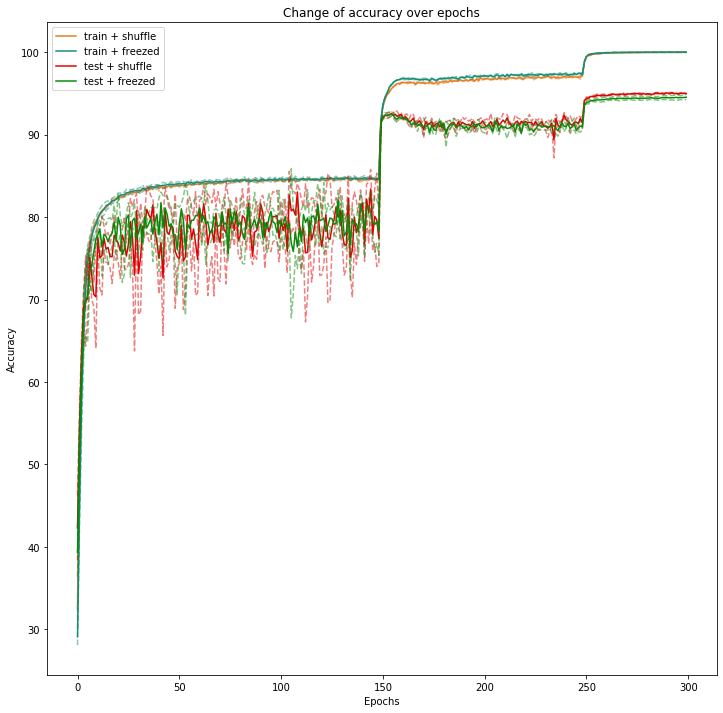

In [6]:
metric_over_epochs(get_acc=True)

Best values:
train + shuffle    0.028925
train + freezed    0.030493
test + shuffle     0.024880
test + freezed     0.025721
dtype: float64


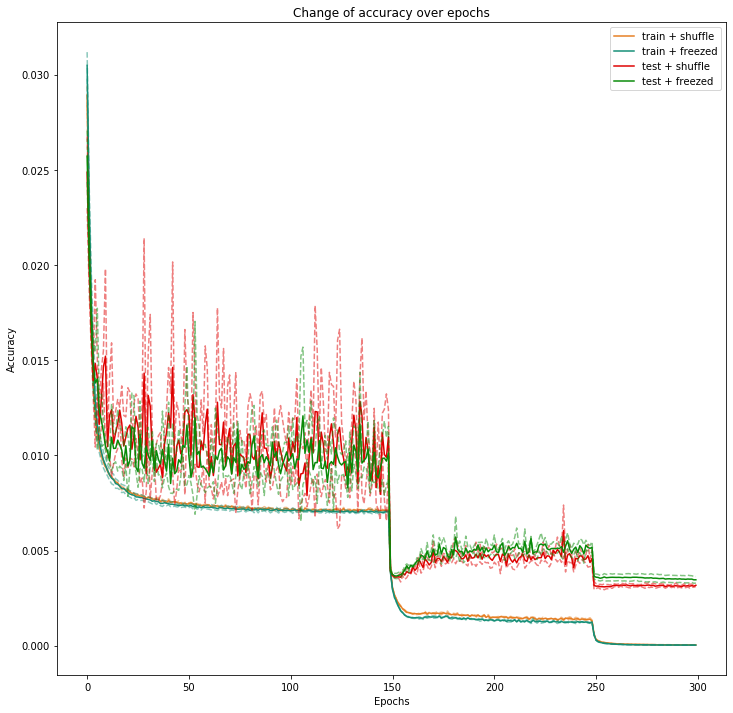

In [7]:
metric_over_epochs(get_acc=False)